# Exploration of 487 vessels in AIS/GBDX marine areas interesection 

Further investigation into the 487 unique MMSI found in intersections between Digital Globe satellite imagery and Spire AIS data, over the time frame from 1st of May of 2016 until the 30th of June 2017, within Marine Areas and Oceans. 281 satellite images.

In [21]:
import utils
import pandas as pd

from utils import db_connect

engine_input = db_connect.alchemy_connect()
conn_input = engine_input.connect()

from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
from src.data import ais_dictionaries

In [23]:
intersection = pd.read_sql_query("SELECT * FROM gbdx_metadata.overlap_marine_ocean_areas",con=engine_input)

In [24]:
static = pd.read_sql_query("SELECT * FROM ais_messages.full_year_static",con=engine_input)

In [25]:
mmsi = intersection.mmsi.unique()

In [26]:
vessels = static[static.mmsi.isin(mmsi)]

## Number of vessels with static data

In [27]:
len(vessels.mmsi.unique())

473

## Number of reported IMOs for each of the 473 vessels

<Container object of 8 artists>

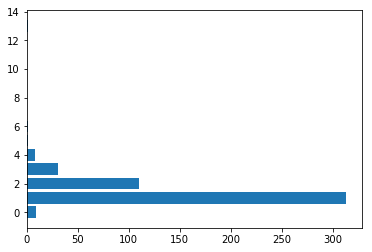

In [37]:
a = vessels.groupby(['mmsi']).imo.nunique().value_counts()
plt.barh(a.index, a.values)

## Number of reported ship_and_cargo_type for each of the 473 vessels

<Container object of 7 artists>

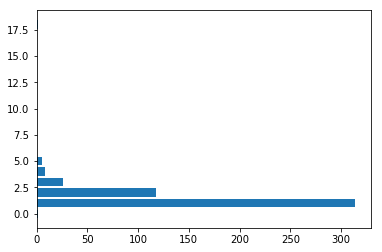

In [38]:
a = vessels.groupby(['mmsi']).ship_and_cargo_type.nunique().value_counts()
plt.barh(a.index, a.values)

# Vessel reported ship_and_cargo_type including duplicates

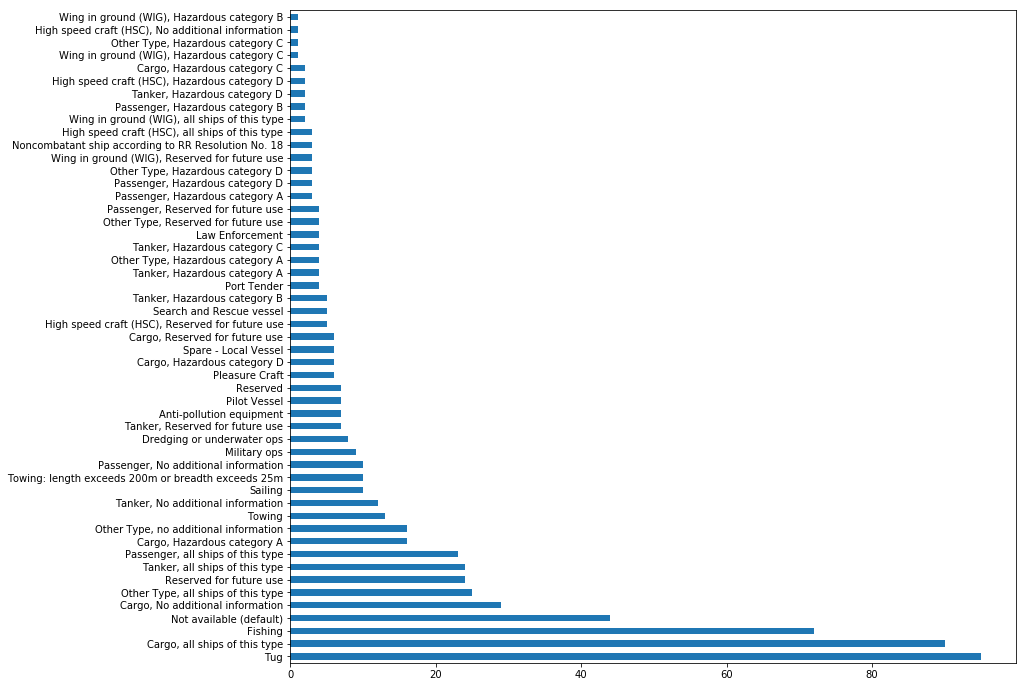

In [126]:
#vessels.dropna(subset=vessels.columns['ship_and_cargo_type'], how='all')
a = vessels[vessels['ship_and_cargo_type'].notnull()].groupby(['mmsi']).ship_and_cargo_type.unique()
alist = [st for row in a for st in row]
a = pd.Series(alist).map(ais_dictionaries.dict_ship_and_cargo_type).value_counts()
plt.rcParams["figure.figsize"] = (13,12)
a.plot.barh()

## Fishing vessels image catalog IDs

In [46]:
fishing_mmsi = pd.Series(vessels[vessels.ship_and_cargo_type==30].mmsi.unique())

In [54]:
fishing_vessel_images = intersection.loc[intersection['mmsi'].isin(fishing_mmsi)]

In [64]:
pd.Series(fishing_vessel_images.index).to_csv('fishing_vessels.csv', index=False)